In [78]:
import xarray as xr
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error


In [2]:
ds = xr.open_dataset(f'downloads/annual.nc',engine='netcdf4')
ds

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 74, latitude: 97, longitude: 121)
Coordinates:
  * time       (time) datetime64[ns] 592B 1950-12-31 1951-12-31 ... 2023-12-31
    number     int32 4B ...
    step       timedelta64[ns] 8B ...
    surface    float64 8B ...
  * latitude   (latitude) float64 776B 13.87 13.77 13.67 ... 4.474 4.374 4.273
  * longitude  (longitude) float64 968B 2.668 2.768 2.868 ... 14.47 14.57 14.67
Data variables:
    t2m        (time, latitude, longitude) float32 3MB ...

In [9]:
df = ds.to_dataframe().reset_index()
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')
print(len(df))
df.head()

868538


,latitude,longitude,t2m,number,step,surface
time,,,,,,
1950-12-31,13.874,2.668000,300.372772,0,1 days,0.0
1950-12-31,13.874,2.768008,300.353119,0,1 days,0.0
1950-12-31,13.874,2.868017,300.414612,0,1 days,0.0
1950-12-31,13.874,2.968025,300.476959,0,1 days,0.0
1950-12-31,13.874,3.068033,300.421783,0,1 days,0.0


In [10]:
# Grouping by location (latitude, longitude)
grouped = df.groupby(['latitude', 'longitude'])
keys = list(grouped.groups.keys())




                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  -8.872
Date:                Sat, 05 Apr 2025   AIC                             23.745
Time:                        20:18:26   BIC                             29.977
Sample:                    12-31-1950   HQIC                            26.177
                         - 12-31-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3738      0.202      1.852      0.064      -0.022       0.769
ma.L1         -0.8181      0.154     -5.312      0.000      -1.120      -0.516
sigma2         0.0784      0.013      5.862      0.0

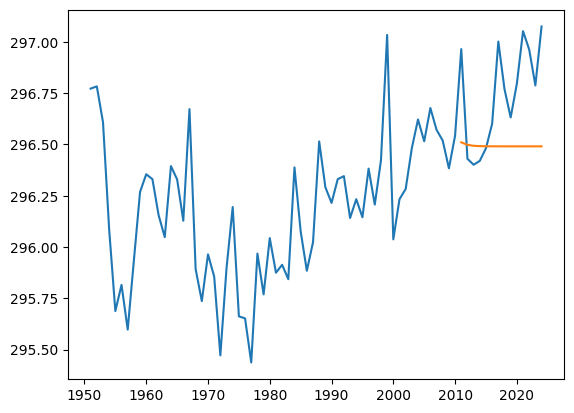

R2 Score:  -1.0810108739005648
RMSE:  0.3439812132621977
MSE:  0.11832307507733353


C:\Users\Ibukunoluwa\AppData\Local\Temp\ipykernel_8608\1684366188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ts['pred'] = pred


In [94]:
ts = grouped.get_group(keys[800])[['t2m']]
train_ts = ts[:60]
test_ts = ts[60:]

arima_model = auto_arima(train_ts,random_state=42)
print(arima_model.summary())

pred = pd.DataFrame(arima_model.predict(n_periods=14))


plt.figure()
plt.plot(ts)
plt.plot(pred)
plt.show()

test_ts['pred'] = pred
r2 = r2_score(test_ts['t2m'], test_ts['pred'])
print("R2 Score: ", r2)
rmse = root_mean_squared_error(test_ts['t2m'], test_ts['pred'])
print("RMSE: ", rmse)
mse = mean_squared_error(test_ts['t2m'], test_ts['pred'])
print("MSE: ", mse)

In [90]:
pd.DataFrame(arima_model.predict(n_periods=30))

,0
2010-12-31,296.658735
2011-12-31,296.566818
2012-12-31,296.515678
2013-12-31,296.487225
2014-12-31,296.471395
2015-12-31,296.462588
2016-12-31,296.457688
2017-12-31,296.454961
2018-12-31,296.453445
2019-12-31,296.452601
